## Active Appearance Models (final)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.spatial import ConvexHull
import cv2
from helper_functions import procrustes_align, AffineRegistrationLandmarks, generalized_procrustes_analysis, applyTransformation, rescale_to_original, inverse_warping

In [14]:
# Loading data
Working_directory=""
with np.load(Working_directory + 'Data_FEI.npz') as data:
    Images=data['Images_FEI'] # list of images
    Landmarks = data['Landmarks_FEI'] # original landmarks
    Y = data['Emotions_FEI'] # class, 0 for neutral and 1 for happy
    Names = data['Names_FEI']
N,M = Landmarks.shape # number subjects
H, W = Images.shape[1:]
dim = 2
M = int(M/dim) # Number of landmarks (they are in 2D)
print('Number of subjects:', N, '; Number of landmarks:',M)
class_names = ["neutral","happy"]

Number of subjects: 400 ; Number of landmarks: 68


# Designing the covariate model for shape and texture

(136,)
Iter number 1 , Error: 0.000585


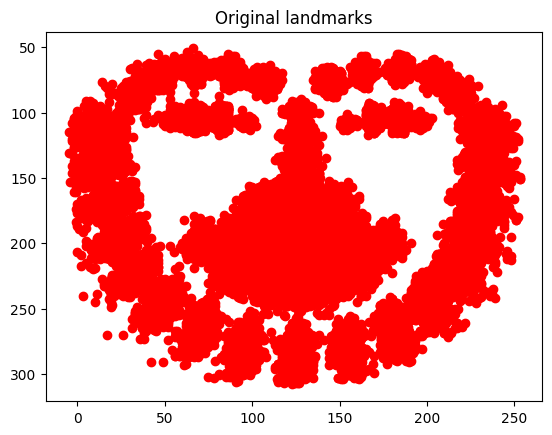

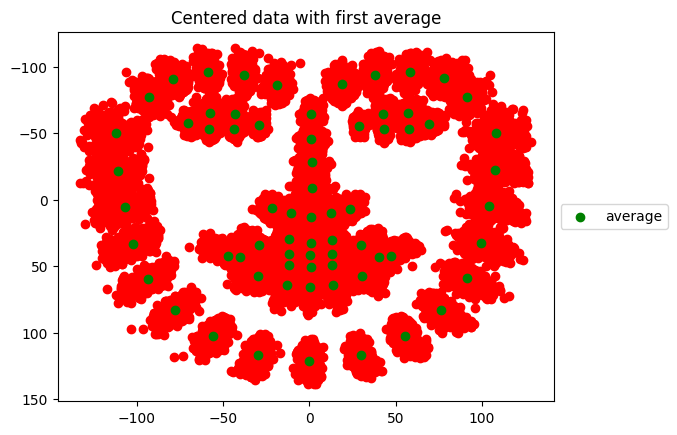

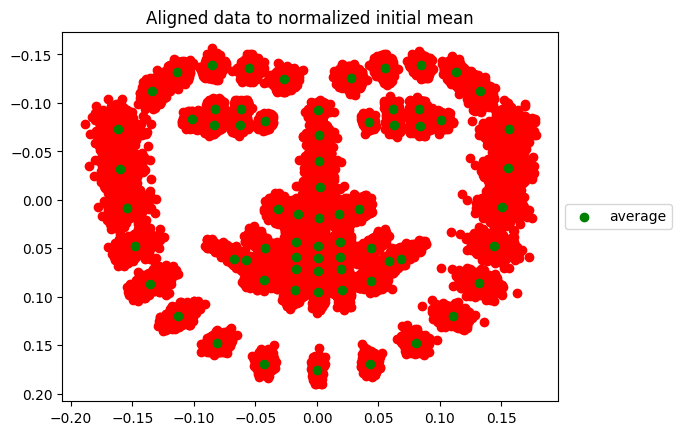

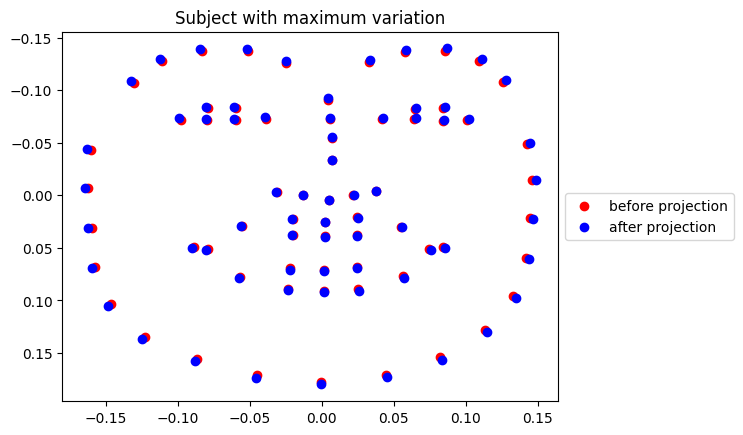

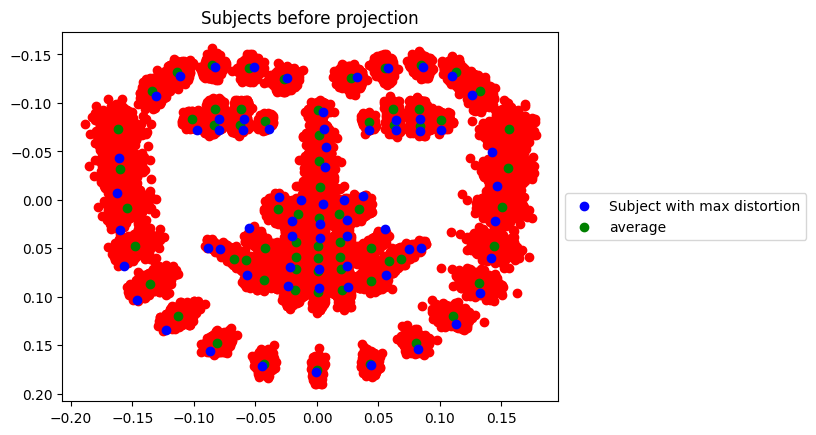

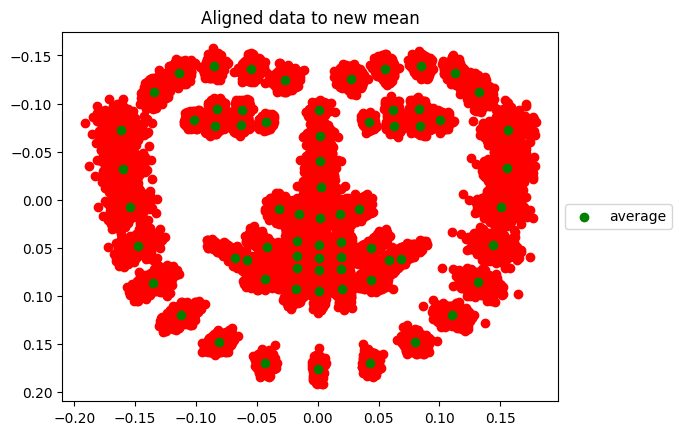

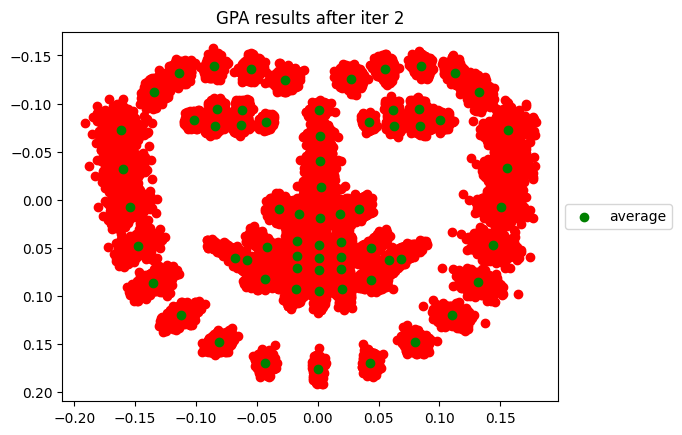

In [3]:
#  GPA (Generalized Procrustes Analysis)
X_sf, Xm1  = generalized_procrustes_analysis(Landmarks,tangent=1) #Sf for Shape free

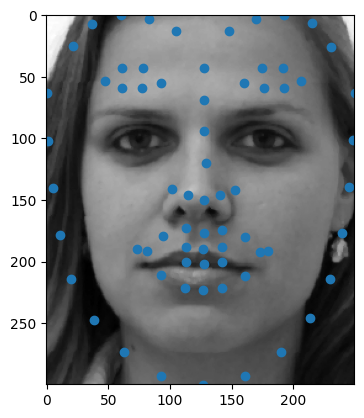

In [15]:
Is = Images[0]
Xm1_rescaled = rescale_to_original(Xm1.reshape(-1,2),H,W)
plt.scatter(Xm1_rescaled[:,0],Xm1_rescaled[:,1])
plt.imshow(Is, cmap='gray')
plt.show()

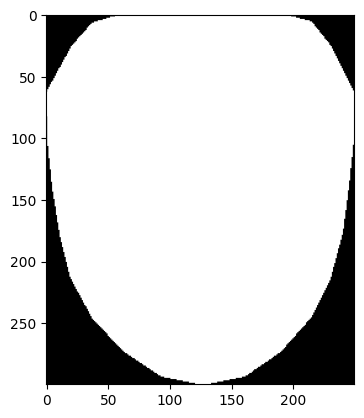

In [26]:
hull = ConvexHull(Xm1_rescaled)

hull_points = Xm1_rescaled[hull.vertices]

mask = np.zeros((H,W))

cv2.fillPoly(mask,[hull_points],1)

plt.imshow(mask,cmap='gray')

plt.show()

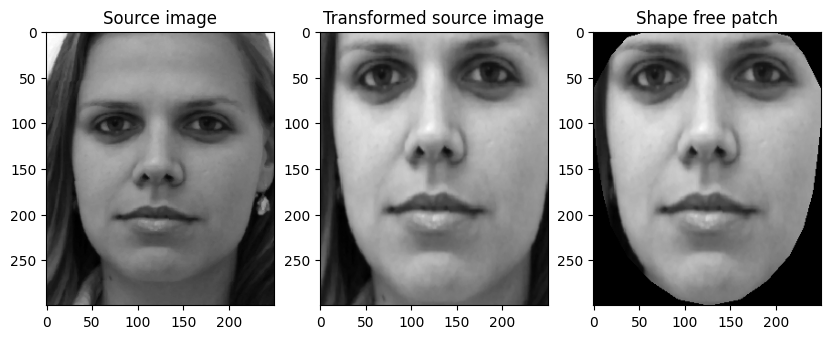

In [42]:
x_0 = Landmarks[0]
_, T = AffineRegistrationLandmarks(x_0.reshape(-1,2),Xm1_rescaled)

Ism = inverse_warping(Is,T,H,W)

fig = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(Is, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(Ism, cmap='gray')
ax2.set_title('Transformed source image')
ax3.imshow(Ism*mask, cmap='gray')
ax3.set_title('Shape free patch')
plt.show()

In [48]:
#Converting all images to shape free images
SF_images = np.zeros((N,H,W))
for i in range(N):
    image = Images[i]
    landmark = Landmarks[i]
    _, T = AffineRegistrationLandmarks(landmark.reshape(-1,2),Xm1_rescaled)
    shape_free_image = inverse_warping(image, T, H, W)
    shape_free_image = shape_free_image*mask
    SF_images[i] = shape_free_image

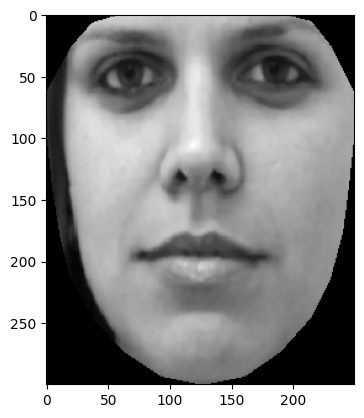

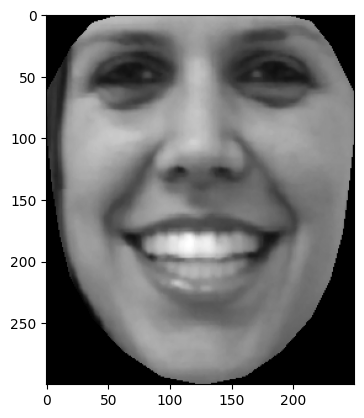

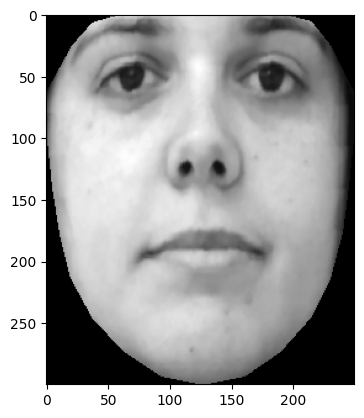

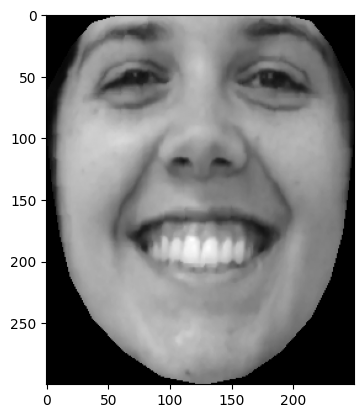

In [55]:
for i in range(4):
    plt.imshow(SF_images[i],cmap='gray')
    plt.show()

In [56]:
print(SF_images.shape)

(400, 300, 250)
